# 必要なライブラリをimprot

In [104]:
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# fix seed
np.random.seed(0)

# 3D-PCRの変数を定義

In [32]:
sample_size = (12, 8, 10)
lambda_param = 1000
shot_num = 10000

# 評価に必要な定数の定義

In [33]:
res = dict(naive=0, arranged=0, equal=0)
log_naive = []
log_arrangement = []
positive_num = []

# Simulator

In [34]:
def calculate_positive_indices(plates):
    """
    platesの配列から再検査が必要なindexを返す

    Parameters
    ----------
    plates : numpy.ndarray
        各plateのpositive/negatieの情報を持つ配列

    Returns
    -------
    retest_indices : list
        再検査が必要なindexのリスト
    """
    # indices = np.nonzero(plates)
    # positives = [(indices[0][i], indices[1][i], indices[2][i]) for i in range(len(indices[0]))]

    c_x = np.where(np.any(plates, axis = (1, 2)))[0].tolist()
    c_y = np.where(np.any(plates, axis = (0, 2)))[0].tolist()
    c_z = np.where(np.any(plates, axis = (0, 1)))[0].tolist()
    re_test = list(itertools.product(c_x, c_y, c_z))
    retest_indices = [j + i*sample_size[1] + sample_size[0]*sample_size[1]*k for i, j, k in re_test]

    # return (c_x, c_y, c_z), retest_indices
    return len(retest_indices)

## Case-1

In [38]:
result_1_low = []
result_1_med = []
result_1_high = []
cases = [1, 5, 12]

for data_density in range(len(cases)):
    for _ in range(shot_num):
        positive_index = np.random.randint(0, 960, cases[data_density])
        positive_index = np.unravel_index(positive_index, (12, 8, 10))
        
        plates = np.zeros(sample_size)
        plates[positive_index] = 1
        
        if data_density == 0:
            result_1_low.append(calculate_positive_indices(plates))
        elif data_density == 1:
            result_1_med.append(calculate_positive_indices(plates))
        elif data_density == 2:
            result_1_high.append(calculate_positive_indices(plates))

In [39]:
# result_1_high

<BarContainer object of 1 artists>

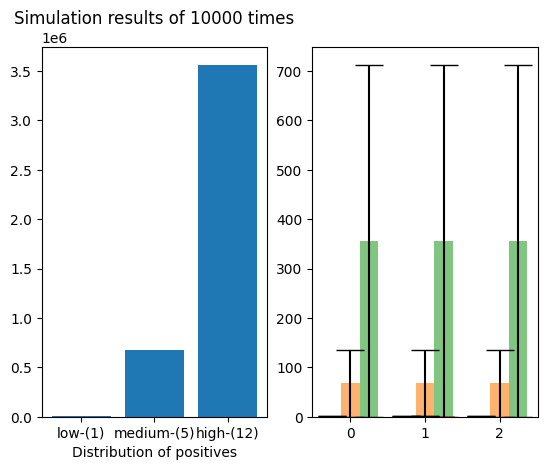

In [41]:
fig = plt.figure()
ax_1 = fig.add_subplot(1, 2, 1)
ax_1.bar([0, 1, 2], [sum(result_1_low), sum(result_1_med), sum(result_1_high)], label=['hoge', 'hoge', 'hoge'])
ax_1.set_xlabel('Distribution of positives')
ticks_location = [0, 1, 2]  # この位置に目盛りを設定
labels = [f'low-({cases[0]})', f'medium-({cases[1]})', f'high-({cases[2]})']   # このラベルを表示
ax_1.set_xticks(ticks_location)
ax_1.set_xticklabels(labels)
ax_1.set_title(f'Simulation results of {shot_num} times')


ax_2 = fig.add_subplot(1, 2, 2)

mean_low = np.mean(result_1_low)
std_dev_low = np.std(result_1_low)
mean_med = np.mean(result_1_med)
std_dev_med = np.mean(result_1_med)
mean_high = np.mean(result_1_high)
std_dev_high = np.mean(result_1_high)

bar_width = 0.25
positions = np.arange(3)
ax_2.bar(positions - bar_width, mean_low, bar_width, yerr=std_dev_low, align='center', alpha=0.6, ecolor='black', capsize=10, label='low')
ax_2.bar(positions, mean_med, bar_width, yerr=std_dev_med, align='center', alpha=0.6, ecolor='black', capsize=10, label='med')
ax_2.bar(positions + bar_width, mean_high, bar_width, yerr=std_dev_high, align='center', alpha=0.6, ecolor='black', capsize=10, label='high')


ax_2.bar(1, mean, yerr=std_dev, align='center', alpha=0.6, ecolor='black', capsize=10)

In [58]:
max(result_1_high)-min(result_1_high)

620

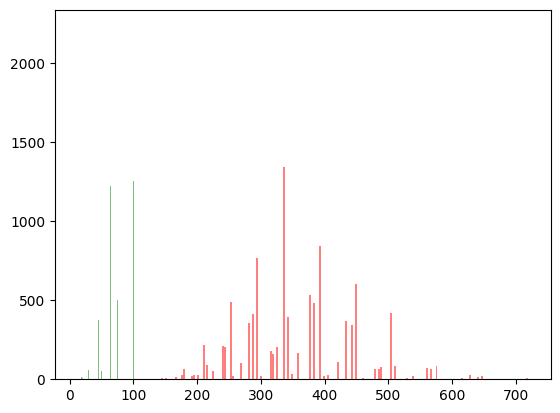

In [61]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# ax.hist(result_1_low, bins=1, alpha=0.5, color='blue')
ax.hist(result_1_med, bins=100, alpha=0.5, color='green')
ax.hist(result_1_high, bins=200, alpha=0.5, color='red')
fig.show()

## case-2

### pの分布を調べる

In [60]:
# data_density = 2
# positive_index = np.random.randint(0, 960, cases[data_density])
# positive_index = np.unravel_index(positive_index, (12, 8, 10))

# plates = np.zeros(sample_size)
# plates[positive_index] = 1

# pre_probability_layer = np.power(np.random.rand(*sample_size), p)
# # pre_probability_layer = np.ones(sample_size)
# random_matrix = np.random.random(sample_size)
# mask = random_matrix < pre_probability_layer
# pseudo_plates = np.where(mask, plates, 1 - plates)

# pre_probability_list = pre_probability_layer.ravel().tolist()
# psudo_plates_list = pseudo_plates.ravel().tolist()
# plates_list = plates.ravel().tolist()

# pseudo_plates_plates_list = [(psudo_plates_list[i], plates_list[i]) for i in range(len(psudo_plates_list))]
# pseudo_plates_plates_list.sort(key=lambda x: x[0], reverse = True)

# arranged_plates = [pseudo_plates_plates_list[i][1] for i in range(len(pseudo_plates_plates_list))]
# arranged_plates = np.array(arranged_plates).reshape(10, 8, 12).transpose(2, 1, 0)
# # arranged_plates

10000 10000
680447 50210
3599918 156659


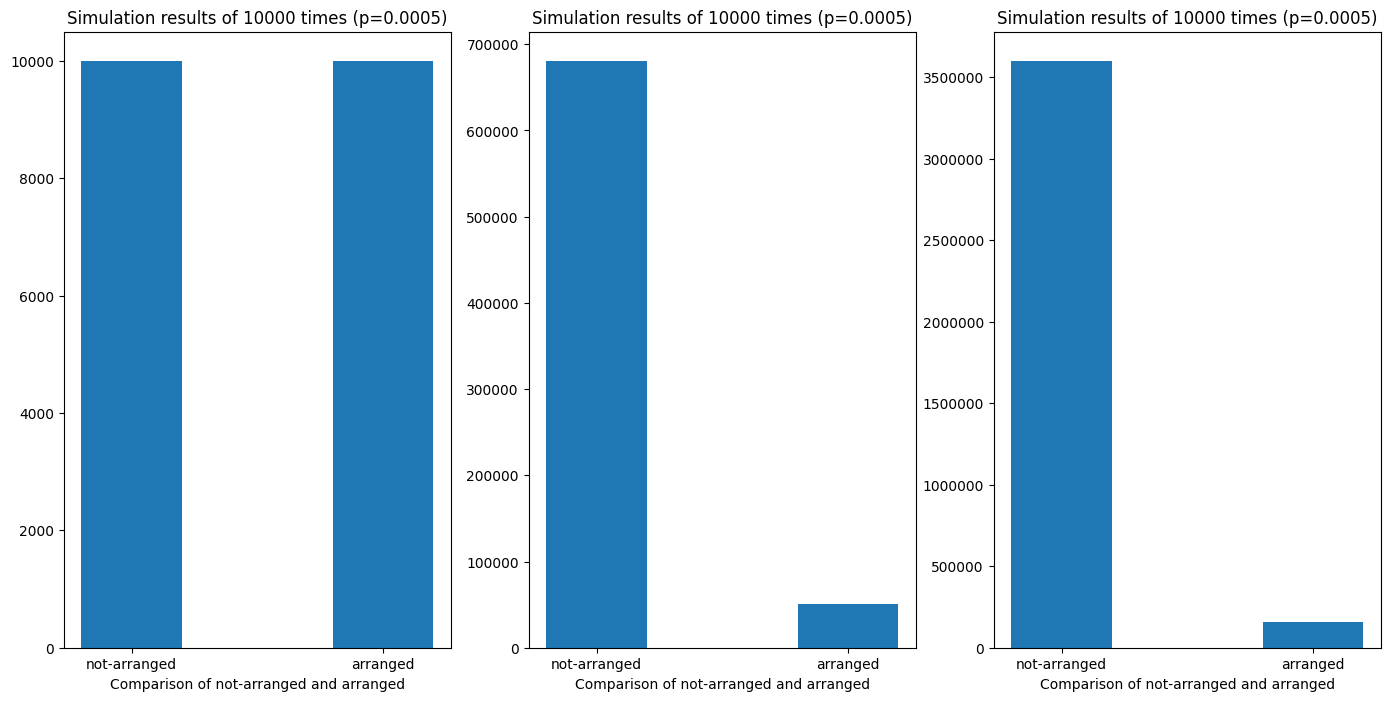

In [59]:
result_2_pure = [] # densityごとに区切っている
result_2_arranged = []
cases = [1, 5, 12]
p = 0.0005

for data_density in range(len(cases)):
    temp_pure = []
    temp_arranged = []
    for _ in range(shot_num):
        # positive_index = np.random.randint(0, 960, size=cases[data_density])
        positive_index = np.random.choice(960, cases[data_density], replace=False)
        
        # print('a', len(positive_index)) if len(positive_index) != cases[data_density] else None, ok
        
        positive_index = np.unravel_index(positive_index, (12, 8, 10))

        # print(len(positive_index)) if len(positive_index) != 3 else None, ok
        # print('a', len(positive_index)) if len(positive_index) != cases[data_density] else None, ok
        
        plates = np.zeros(sample_size)
        plates[positive_index] = 1

        # print(len(np.nonzero(plates)[0]), positive_index) if len(np.nonzero(plates)[0]) != cases[data_density] else None, ok
              
        temp_pure.append(calculate_positive_indices(plates))
        # print(temp_pure[-1]) if cases[data_density] == 1 and temp_pure[-1] != 1 else None, ok
        
        pre_probability_layer = np.power(np.random.rand(*sample_size), p)
        random_matrix = np.random.random(sample_size)
        mask = random_matrix < pre_probability_layer
        pseudo_plates = np.where(mask, plates, 1 - plates)

        pre_probability_list = pre_probability_layer.ravel().tolist()
        psudo_plates_list = pseudo_plates.ravel().tolist()
        plates_list = plates.ravel().tolist()

        # print(sum(plates_list)) if sum(plates_list) != cases[data_density] else None, ok
        
        pseudo_plates_plates_list = [(psudo_plates_list[i], plates_list[i]) for i in range(len(psudo_plates_list))]
        pseudo_plates_plates_list.sort(key=lambda x: x[0], reverse = True)

        arranged_plates = [pseudo_plates_plates_list[i][1] for i in range(len(pseudo_plates_plates_list))]
        
        # print(sum(arranged_plates)) if sum(arranged_plates) != cases[data_density] else None, ok
        
        arranged_plates = np.array(arranged_plates).reshape(10, 8, 12).transpose(2, 1, 0)
        
        print(len(np.nonzero(arranged_plates)[0])) if len(np.nonzero(arranged_plates)[0]) != cases[data_density] else None
        # check upper bound and lower bound
        print('a', len(np.nonzero(arranged_plates)[0])) if not(cases[data_density] <= calculate_positive_indices(arranged_plates) <= min(cases[data_density], 12) * min(cases[data_density], 8), min(cases[data_density], 10)) else None
        
        temp_arranged.append(calculate_positive_indices(arranged_plates))

    result_2_pure.append(temp_pure)
    result_2_arranged.append(temp_arranged)

# visualize
fig = plt.figure(figsize=(17, 8))

for i in range(len(result_2_pure)):
    ax = fig.add_subplot(1, 3, i+1)

    ax.bar([0, 2], [sum(result_2_pure[i]), sum(result_2_arranged[i])])
    print(sum(result_2_pure[i]), sum(result_2_arranged[i]))
    ax.set_xlabel('Comparison of not-arranged and arranged')

    ticks_location = [0, 2]  # この位置に目盛りを設定
    labels = ['not-arranged', 'arranged']   # このラベルを表示

    ax.set_xticks(ticks_location)
    ax.set_xticklabels(labels)
    ax.set_title(f'Simulation results of {shot_num} times (p={p})')

    ax.ticklabel_format(style='plain',axis='y')
fig.show()

## case-3

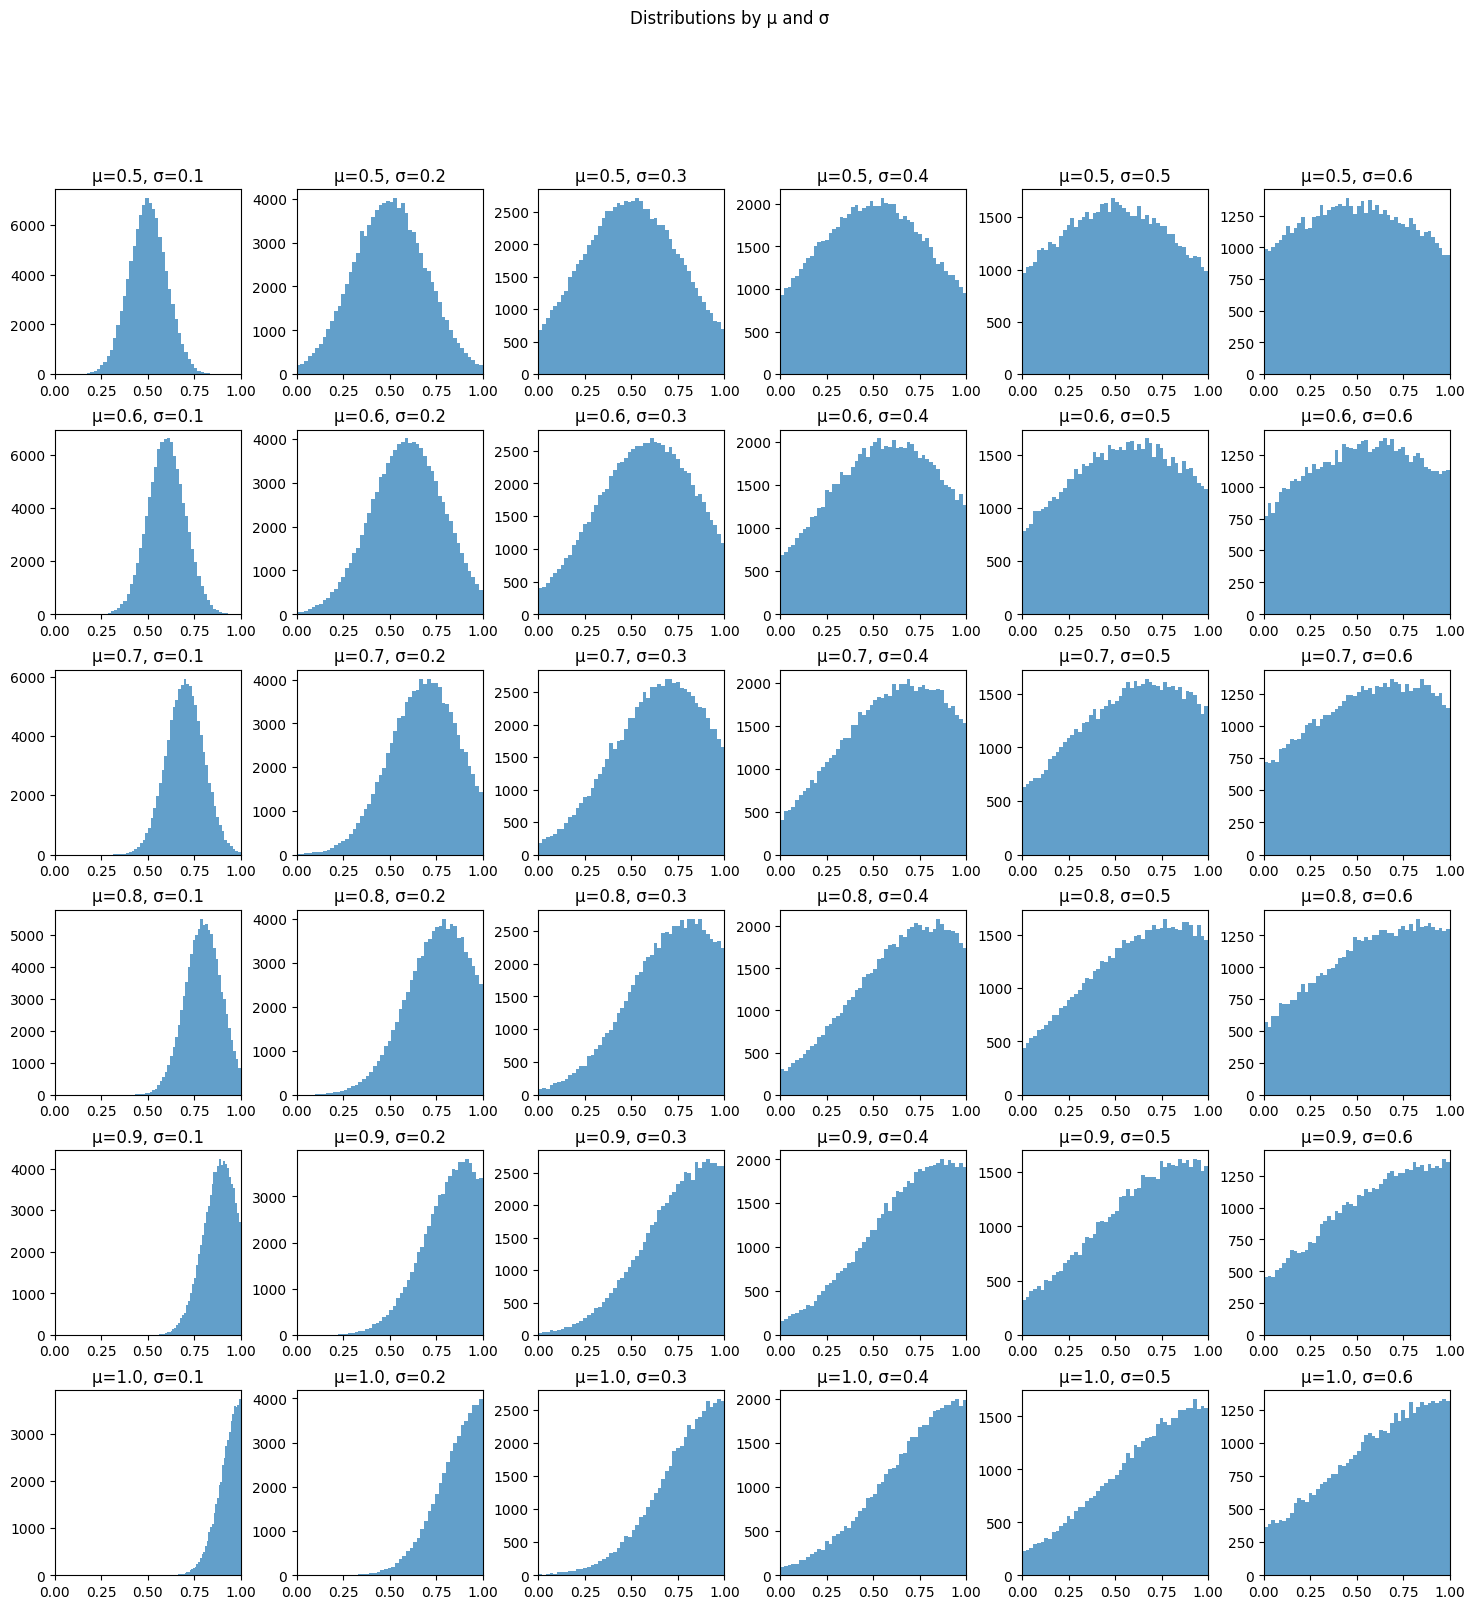

In [85]:
means = [round(i*0.1, 2) for i in range(5, 11)]
std_devs = [round(i*0.1, 2) for i in range(1, 7)]
params = list(itertools.product(means, std_devs))
sampling_num = 100000

hidden_probability_list = []

fig = plt.figure(figsize=(18, 18))

for i in range(len(params)):
    mu, sigma = params[i]
    samples = np.random.normal(mu, sigma, sampling_num)
    samples = samples[(samples >= 0) & (samples <= 1)]
    ax = fig.add_subplot(6, 6, i+1)
    ax.hist(samples, bins=50, alpha=0.7)
    ax.set_xlim(0, 1)
    ax.set_title(f'μ={mu}, σ={sigma}')

    hidden_probability_list.append(samples[:12*8*10].reshape((12, 8, 10)))

fig.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle('Distributions by μ and σ')
fig.show()

In [101]:
result_3_pure = []
result_3_arranged = []

data_density = 2
cases = [1, 5, 12]

for i in range(len(hidden_probability_list)):
    temp_pure = []
    temp_arranged = []
    for _ in range(shot_num):
        positive_index = np.random.choice(960, cases[data_density], replace=False)
        
        # print('a', len(positive_index)) if len(positive_index) != cases[data_density] else None, ok
        
        positive_index = np.unravel_index(positive_index, (12, 8, 10))

        # print(len(positive_index)) if len(positive_index) != 3 else None, ok
        # print('a', len(positive_index)) if len(positive_index) != cases[data_density] else None, ok
        
        plates = np.zeros(sample_size)
        plates[positive_index] = 1

        # print(len(np.nonzero(plates)[0]), positive_index) if len(np.nonzero(plates)[0]) != cases[data_density] else None, ok

        # print(temp_pure[-1]) if cases[data_density] == 1 and temp_pure[-1] != 1 else None, ok
        
        pre_probability_layer = hidden_probability_list[i]
        random_matrix = np.random.random(sample_size)
        mask = random_matrix < pre_probability_layer
        pseudo_plates = np.where(mask, plates, 1 - plates)

        pre_probability_list = pre_probability_layer.ravel().tolist()
        psudo_plates_list = pseudo_plates.ravel().tolist()
        plates_list = plates.ravel().tolist()

        # print(sum(plates_list)) if sum(plates_list) != cases[data_density] else None, ok
        
        pseudo_plates_plates_list = [(psudo_plates_list[i], plates_list[i]) for i in range(len(psudo_plates_list))]
        pseudo_plates_plates_list.sort(key=lambda x: x[0], reverse = True)

        arranged_plates = [pseudo_plates_plates_list[i][1] for i in range(len(pseudo_plates_plates_list))]
        
        # print(sum(arranged_plates)) if sum(arranged_plates) != cases[data_density] else None, ok
        
        arranged_plates = np.array(arranged_plates).reshape(10, 8, 12).transpose(2, 1, 0)
        
        print(len(np.nonzero(arranged_plates)[0])) if len(np.nonzero(arranged_plates)[0]) != cases[data_density] else None
        # check upper bound and lower bound
        print('a', len(np.nonzero(arranged_plates)[0])) if not(cases[data_density] <= calculate_positive_indices(arranged_plates) <= min(cases[data_density], 12) * min(cases[data_density], 8), min(cases[data_density], 10)) else None

        temp_pure.append(calculate_positive_indices(plates))
        temp_arranged.append(calculate_positive_indices(arranged_plates))

    result_3_pure.append(temp_pure)
    result_3_arranged.append(temp_arranged)

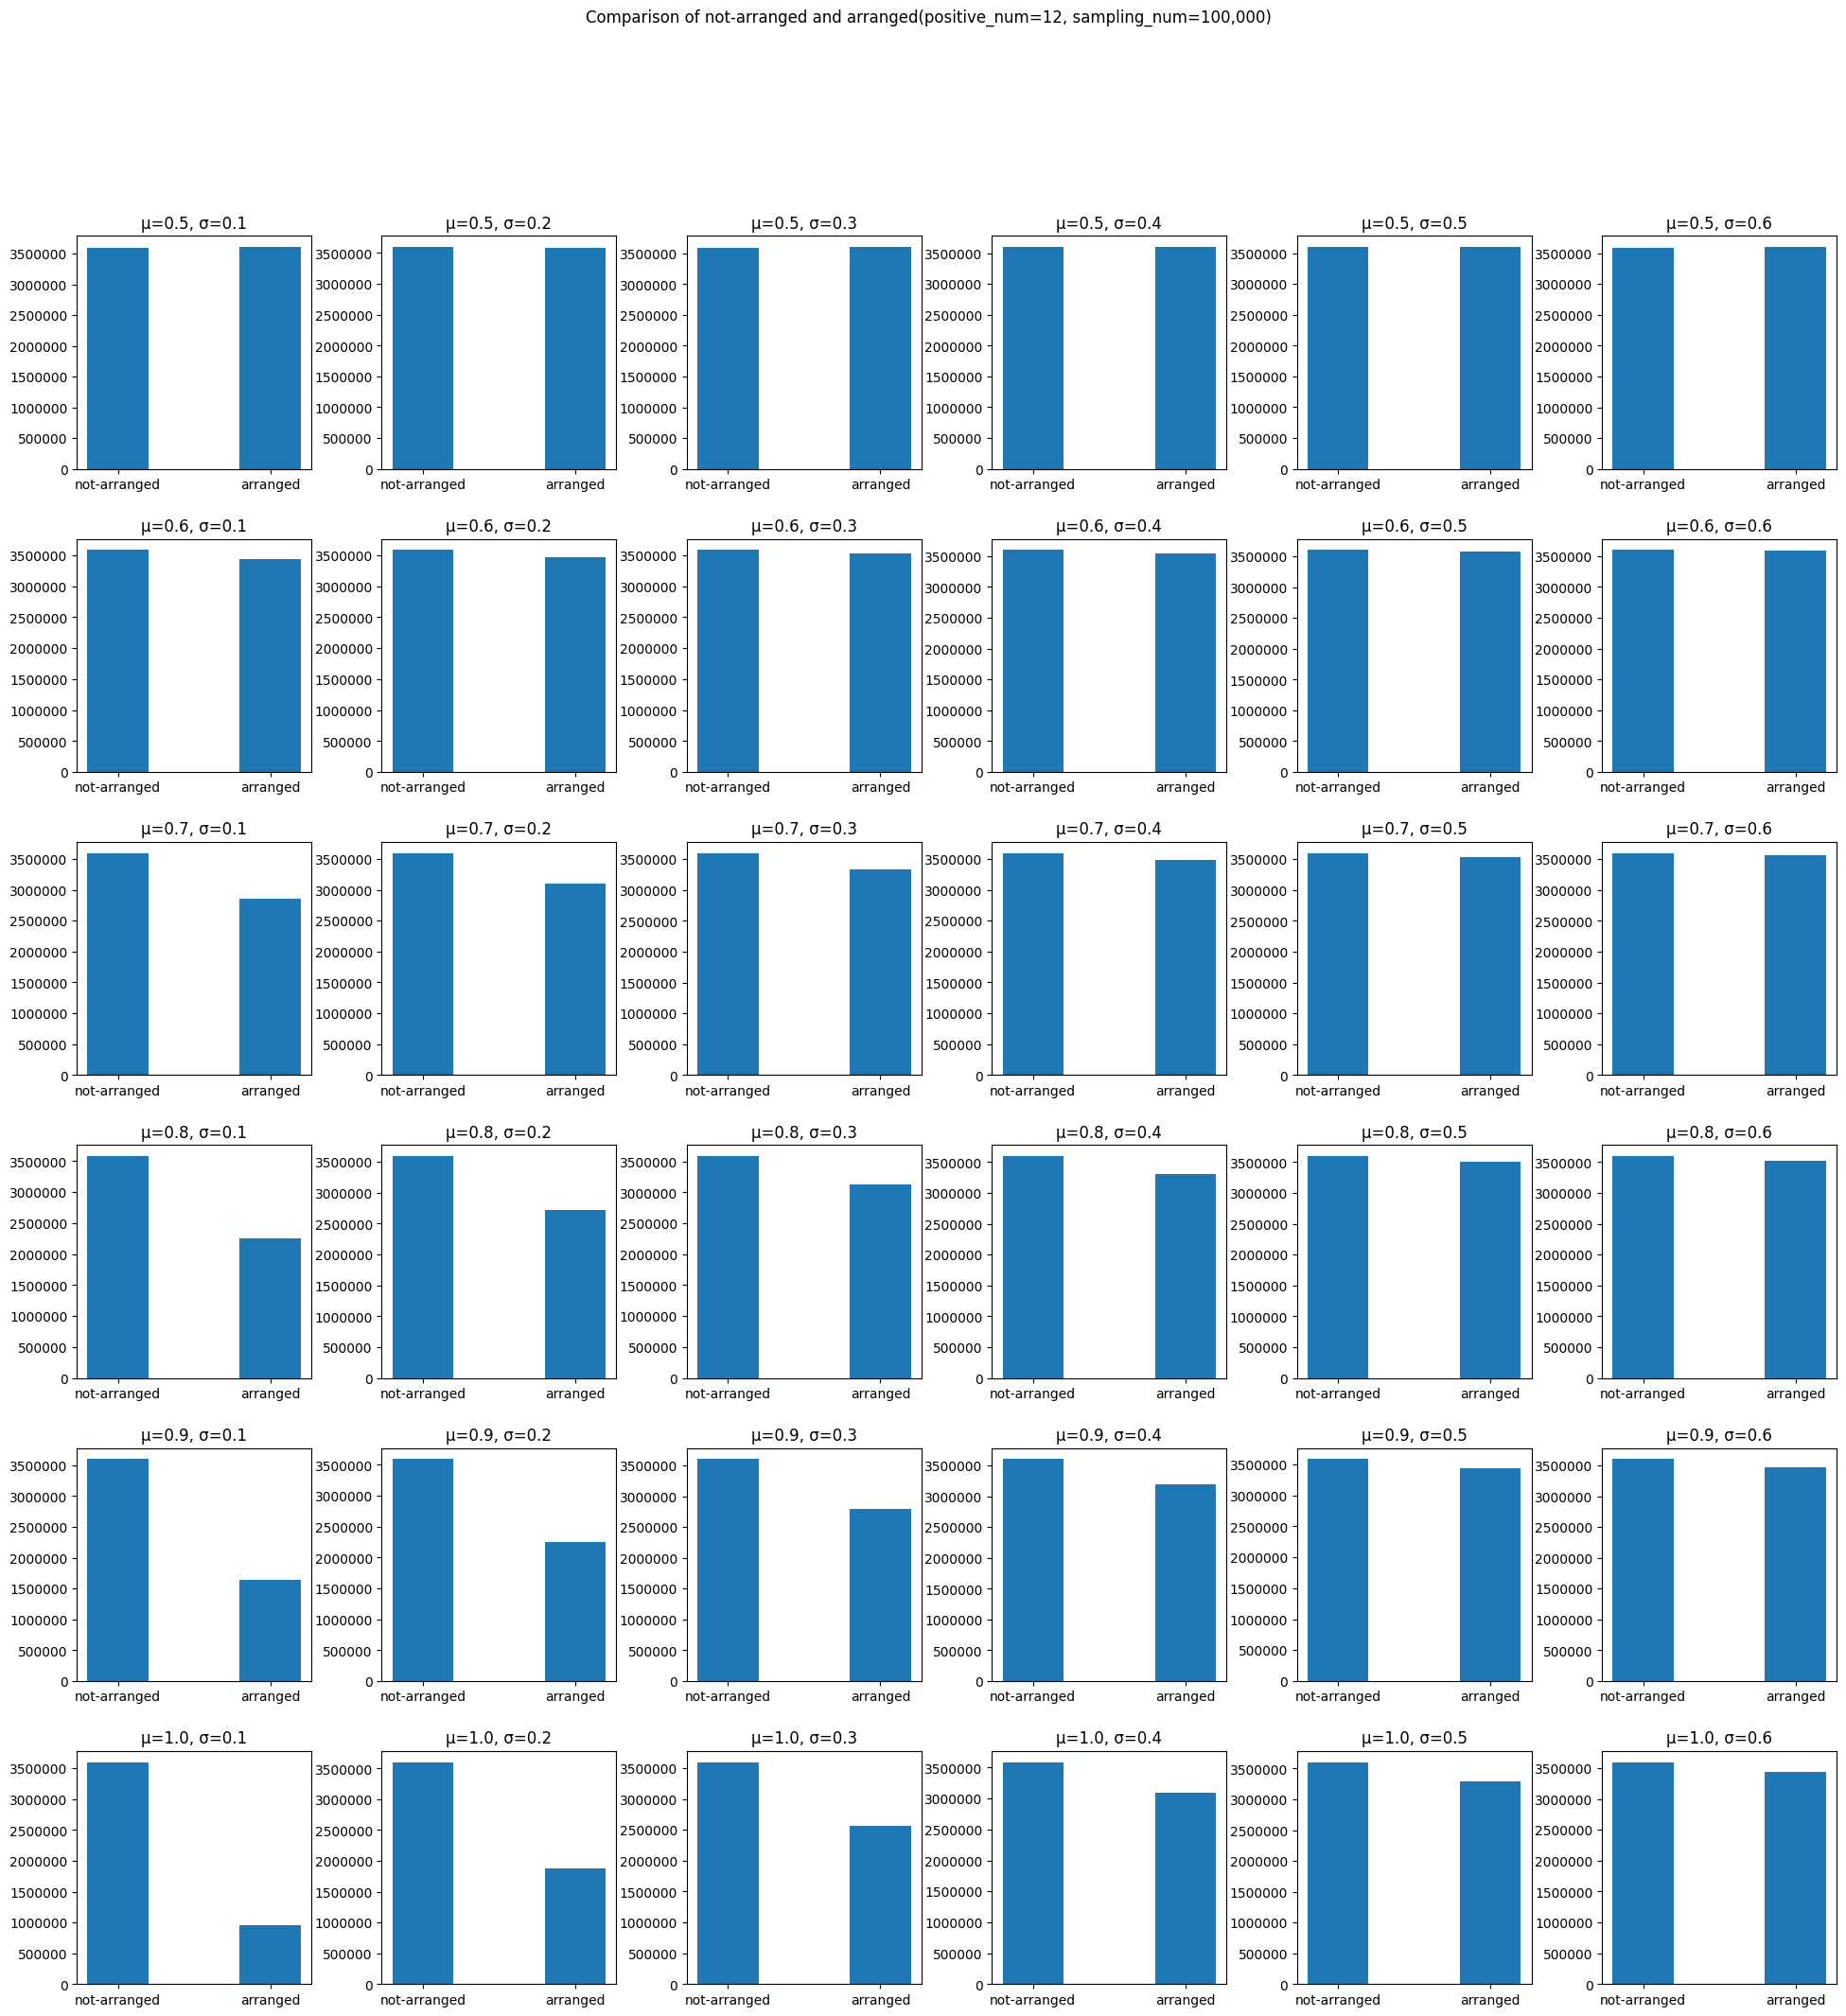

In [102]:
fig = plt.figure(figsize=(24, 24))

for i in range(len(hidden_probability_list)):
    ax = fig.add_subplot(6, 6, i+1)
    ax.bar([0, 2], [sum(result_3_pure[i]), sum(result_3_arranged[i])])
    # print(sum(result_3_pure[i]), sum(result_3_arranged[i])) if sum(result_3_pure[i]) != sum(result_3_arranged[i]) else None
    ticks_location = [0, 2]  # この位置に目盛りを設定
    labels = ['not-arranged', 'arranged']   # このラベルを表示

    ax.set_title(f'μ={params[i][0]}, σ={params[i][1]}')
    ax.set_xticks(ticks_location)
    ax.set_xticklabels(labels)
    # ax.set_title(f'Simulation results of {shot_num} times')

    ax.ticklabel_format(style='plain',axis='y')

fig.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle(f'Comparison of not-arranged and arranged(positive_num={cases[data_density]}, sampling_num=100,000)')
fig.show()

# Human practice feedback